# Creation of a american words lexicon/vocabulary

This notebook implements the creation of an american words lexicon which will then used to assess the "percentage" of american culture in each plot summaries (see notebook *results_P3.ipynb*). The procedure is the following. One retrieves the text of wikipedia pages of many countries including the United States. Then, every raw text retrieved from the wikipedia pages is tokennized using the NLP pipeleine of the Python library *Spacy*. Finally, the lexicon of typical american words is created by taking the intersection between the tokens of the USA wikipedia pages and the tokens of all other wikipedia pages.

In [1]:
# Needed libraries
#import spacy # to implement NLP on the wikipedia page text
import pickle # to save the set of unique amercians words, i.e. the lexicon of american words in format one can reuse later in other notebooks
import wikipedia # to retrieve wikipedia page text content

In [ ]:
# Initialize the Spacy analyzer in English since all the wikipedia pages are analysed in English
nlp = spacy.load("en_core_web_sm")

# Function to process a Wikipedia page
def process_page(page_name):
    page_content = wikipedia.page(page_name, auto_suggest=False).content.replace('==', '').replace('\n', '')
    doc = nlp(page_content) # tokenizing each page
    return [token.lemma_.lower() for token in doc if not token.is_stop and token.is_alpha] # removing stopwords and non alphabetic characters (with .is_alpha) and lemmatize the text to discard close form of the same word

# Process each page separately for verification and clarity purposes
us_words = process_page('United States') # https://en.wikipedia.org/wiki/United_States 
#fr_words = process_page('France') # https://en.wikipedia.org/wiki/France 
uk_words = process_page('United Kingdom') # https://en.wikipedia.org/wiki/United_Kingdom 
de_words = process_page('Germany') # https://en.wikipedia.org/wiki/Germany 
#it_words = process_page('Italy') # https://en.wikipedia.org/wiki/Italy 
#jp_words = process_page('Japan') # https://en.wikipedia.org/wiki/Japan 
#ch_words = process_page('Switzerland') # https://en.wikipedia.org/wiki/Switzerland 
ir_words = process_page('Ireland') # https://en.wikipedia.org/wiki/Ireland --> since Ireland has a strong impact on amercican culture
cn_words = process_page('Canada') # https://en.wikipedia.org/wiki/Canada 
nz_words = process_page('New Zealand') # https://en.wikipedia.org/wiki/New_Zealand

# Combine words from FR, UK, DE and keep only the unique ones for faster processing
other_words = set( uk_words + de_words + ir_words + cn_words + nz_words)

# Extract unique US words using the set() function
unique_us_words = set(us_words) - other_words

print(f"The list of unique US words is: \n {unique_us_words}")
print(f"Unique US words: {len(unique_us_words)}")
# https://www.britannica.com/place/United-States
# https://en.wikipedia.org/wiki/Culture_of_the_United_States 
# intersection plutot que soustraction

The list of unique US words is: 
 {'mottos', 'thanksgiving', 'shortening', 'wright', 'elevate', 'species', 'shirt', 'beecher', 'northrop', 'jay', 'lincoln', 'tranquility', 'jefferson', 'katharine', 'twain', 'quadrilateral', 'federalize', 'ordinance', 'pardon', 'woodworking', 'edgar', 'charity', 'moylan', 'collective', 'bhutan', 'unorganized', 'gritty', 'chef', 'hunger', 'outpace', 'siteshouse', 'nextstep', 'piedmont', 'expression', 'majesty', 'roy', 'isabelle', 'flour', 'favor', 'fill', 'mars', 'gateway', 'tide', 'roth', 'madison', 'celebrated', 'andy', 'salad', 'liberty', 'microprocessor', 'amphibian', 'indicators', 'broadway', 'las', 'accessible', 'totality', 'zee', 'battles', 'surviving', 'hispanics', 'super', 'utilize', 'machine', 'francisco', 'walt', 'aggression', 'ellington', 'exploitation', 'vacation', 'oldsmobile', 'harlem', 'periodical', 'acquire', 'mississippian', 'articles', 'armory', 'pot', 'airplane', 'lockheed', 'dissatisfaction', 'ussr', 'artisan', 'deteriorate', 'sinatr

In [18]:
print(type(unique_us_words))
if 'thanksgiving' in unique_us_words:
    print("yes")

<class 'set'>
yes


### Verification of the results with a small list of very american words

One notices that *hollywood*, *thanksgiving* and *comboy* are not in the *unique_us_words* dictionnary although they are "very" american words. This arises because other wikipedia pages main contains these words. For example, the word *hollywood* appears in the wikipedia page of France and *thanksgiving* in the page of Japan, removing them from the *unique_us_words*.

In [ ]:
list_straightforward_American_words = ['hollywood', 'cowboy', 'thanksgiving', 'donut', 'broadway', 'sheriff', 'mcdonald', 'doughnut', 'hamburger', 'pentagon', 'halloween', 'usa', 'U.S.']

words_in_list = []
words_not_in_list = []

for amercian_word in list_straightforward_American_words:
    if amercian_word in unique_us_words:
        words_in_list.append(amercian_word)
    else:
        words_not_in_list.append(amercian_word)

print(f"The words that are both in the US wikipedia list and in the simple straightforward american list are {words_in_list}")
print(f"The words that are in the US wikipedia list but NOT in the simple straightforward american list are {words_not_in_list}")

The words that are both in the US wikipedia list and in the simple straightforward american list are ['hollywood', 'thanksgiving', 'donut', 'broadway', 'sheriff', 'mcdonald', 'doughnut', 'hamburger', 'pentagon', 'usa']
The words that are in the US wikipedia list but NOT in the simple straightforward american list are ['cowboy', 'halloween', 'U.S.']


# FAIRE UN NUAGE DE MOTS

### ChatGPT

In [6]:
american_words_chatGPT = {
    "thanksgiving", "hollywood", "pentagon", "donut", "doughnut", "bald eagle", "nascar", 
    "silicon valley", "cheeseburger", "harley-davidson", "super bowl", "route 66", "apple pie", 
    "fourth of july", "uncle sam", "yellowstone", "jazz", "manifest destiny", "elvis", "broadway", 
    "rodeo", "baseball", "cowboy", "nfl", "graceland", "mount rushmore", "times square", 
    "liberty bell", "wall street", "alcatraz", "bourbon", "kentucky derby", "grand canyon", 
    "las vegas strip", "motown", "fort knox", "mississippi river", "colt revolver", "american dream", 
    "statue of liberty", "yosemite", "harvard", "route 1", "mlb", "rockefeller center", "broadway show", 
    "thanksgiving parade", "new orleans", "silicon valley startup", "space race", "apollo mission", 
    "moon landing", "brooklyn bridge", "manhattan", "alamo", "wild west", "cowboy boots", 
    "bbq", "hot dog", "corn dog", "s'mores", "marshmallow", "pumpkin pie", "mac and cheese", 
    "cola", "root beer", "milkshake", "fast food", "drive-in", "motel", "pickup truck", 
    "suv", "jeep", "cadillac", "ford", "mustang", "buick", "chevrolet", "route 66 diner", 
    "road trip", "motels", "gas station", "suburbia", "trailer park", "american football", 
    "basketball", "nba", "college football", "tailgating", "cheerleading", "homecoming", 
    "prom", "high school graduation", "yearbook", "spring break", "summer camp", "scout jamboree", 
    "boy scouts", "girl scouts", "thanksgiving dinner", "black friday", "cyber monday", 
    "small business saturday", "presidents' day", "memorial day", "veterans day", "labor day", 
    "columbus day", "independence day", "mlk day", "election day", "electoral college", 
    "super tuesday", "swing state", "inauguration day", "congress", "senate", "house of representatives", 
    "supreme court", "white house", "capitol hill", "state of the union", "stars and stripes", 
    "american flag", "old glory", "liberty", "freedom", "democracy", "constitution", 
    "bill of rights", "declaration of independence", "founding fathers", "revolutionary war", 
    "civil war", "gettysburg", "lincoln memorial", "jefferson memorial", "mount vernon", 
    "smithsonian", "national archives", "mcdonalds", "sheriff", "hamburger", "usa", "U.S.", "united states"
}

print(f"The number of american words generated with ChatGPT are {len(american_words_chatGPT)}")

list_straightforward_American_words = ['hollywood', 'cowboy', 'thanksgiving', 'donut', 'broadway', 'sheriff', 'mcdonald', 'doughnut', 'hamburger', 'pentagon', 'halloween', 'usa', 'U.S.']

words_in_list = []
words_not_in_list = []

for amercian_word in list_straightforward_American_words:
    if amercian_word in american_words_chatGPT:
        words_in_list.append(amercian_word)
    else:
        words_not_in_list.append(amercian_word)

print(f"The words that are both in the US wikipedia list and in the simple straightforward american list are {words_in_list}")
print(f"The words that are in the US wikipedia list but NOT in the simple straightforward american list are {words_not_in_list}")

The number of american words generated with ChatGPT are 146
The words that are both in the US wikipedia list and in the simple straightforward american list are ['hollywood', 'cowboy', 'thanksgiving', 'donut', 'broadway', 'sheriff', 'doughnut', 'hamburger', 'pentagon', 'usa', 'U.S.']
The words that are in the US wikipedia list but NOT in the simple straightforward american list are ['mcdonald', 'halloween']


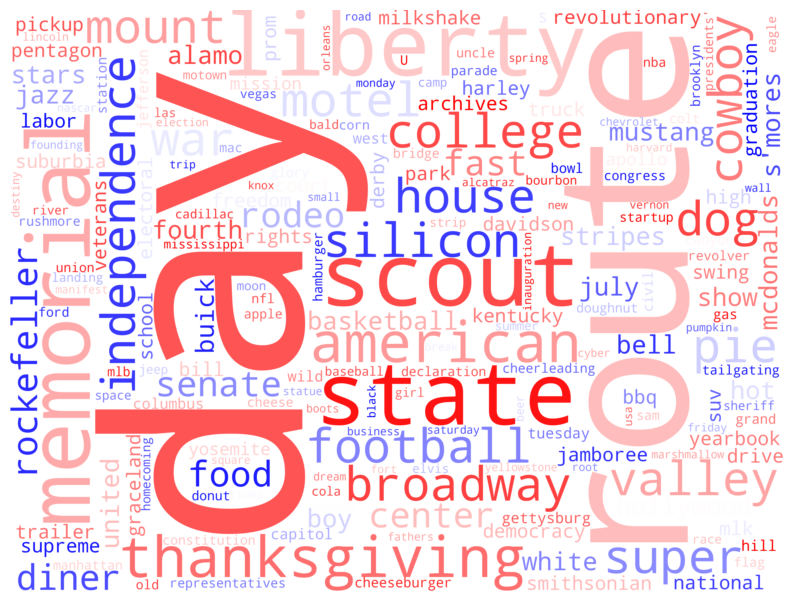

In [11]:
import matplotlib.pyplot as plt  
 
# pip install wordcloud
from wordcloud import WordCloud, STOPWORDS  
import numpy as np
from PIL import Image

# Inspiration taken from: https://www.datacamp.com/tutorial/wordcloud-python & https://stackoverflow.com/questions/67984542/can-we-change-the-color-of-the-wordcloud-to-make-it-darker-in-python-can-wordcl 
 
# Load the American flag mask
# mask = np.array(Image.open(r'C:/Users/YourName/american_flag_mask.png'))

# Define text from the set of words
text = " ".join(american_words_chatGPT)

# Create the WordCloud
wc = WordCloud(
    background_color="white",
    max_words=2000,
    contour_width=3,
    contour_color="red",
    colormap= "bwr",
    width=4000,      # Increase image width
    height=3000 
)

# Generate the word cloud
wc.generate(text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# Optionally, save the word cloud image
wc.to_file("data/american_flag_wordcloud_lexicon.png", dpi = 300)

### Saving the lexicon of US words for later use

In [19]:
# Save the set
with open('data/unique_us_words_set.pkl', 'wb') as f:
    pickle.dump(unique_us_words, f)


In [ ]:
from nltk.corpus import cmudict

cmu_dict = cmudict.dict()
american_words = set(cmu_dict.keys())
print(len(american_words))
print(american_words)

from nltk.corpus import wordnet as wn

american_words = set(lemma.name() for synset in wn.all_synsets() for lemma in synset.lemmas(lang='eng'))
print(len(american_words))


123455
{'townships', 'cutrona', 'connor', "superpowers'", 'chips', 'rillette', 'fielders', 'gamest', 'downham', 'fangs', 'bugaboo', 'honold', 'kunstler', 'geoffrion', 'hewing', 'penniless', 'quibbling', 'teheranis', 'antigen', 'cossat', 'macneil', 'ambidextrous', 'duis', 'harrell', 'promulgates', 'stopgap', 'meticulously', 'hof', 'lighters', 'deiter', 'deontology', 'bandicoots', 'montemayor', 'radell', 'gessel', 'communities', 'stress', 'mondeo', 'hydrographic', 'duplication', "payer's", 'piggy', 'bose', 'fritzi', 'roads', 'digressed', 'wysocki', 'moshus', 'chewer', 'microx', 'hersom', 'recriminations', 'neises', 'lackeys', 'selflessness', 'postal', 'kachuck', 'run', 'messaging', 'backpacks', 'shoultz', 'ferrington', 'pavia', 'scalamandre', 'inarticulate', 'athletics', 'rutter', 'grunge', 'tamposi', 'allusion', 'kinst', 'germer', 'lipovsky', 'schirtzinger', 'gourmet', 'dothan', 'truax', 'unabridged', 'creutzfeldt', 'cowser', 'greiff', 'ballplayers', 'homosexuals', 'hauf', 'rationales',

In [ ]:
# old chloé
# Extract United States 
import wikipedia
import spacy 
nlp = spacy.load('en_core_web_sm')

list_wiki_pages = ['France', 'United Kingdom', 'Germany'] # list of wikipedia pages used to extract the lexicon of american culture
text_FR_DE_UK = []

# # Extract the text of the wikipedia page specified above
for page in list_wiki_pages:
    page = wikipedia.page(page) # acces the page
    text = page.content # extract the raw tet content expcet images, tables etc.
    text = text.replace('==', '')
    text_FR_DE_UK.append(text)

wiki_us = wikipedia.page('United States') # Keep the US wikipedia page on the side since it's the target 

# Extract the plain text content of the page, excluding images, tables, and other data.
text_us = wiki_us.content


# # Replace '==' with '' (an empty string)
text_us = text_us.replace('==', '')

#print(text_us)
#print("Last 12 characters before slicing:", text_us.replace('\n', '')[-12:])

# # Replace '\n' (a new line) with '' & end the string at $1000.
text = text_us.replace('\n', '')#[:-12]

encoded_text = nlp(text)
print(encoded_text)


#encoded_text[1]

encoded_text[1].text

if any(token.text == "Hollywood" for token in encoded_text):
    print(f"bla is in the text!")
    # Words that appear in USa summaries but not in foreign ones 
american_vocab = [i.text for i in encoded_text]
print(american_vocab)
print(len(american_vocab))

no_dupli = list(set(american_vocab))
len(no_dupli)

bla is in the text!
